In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('/home/pi/Documents/Git/Josephson_Junction_Neuromorphic-Raspi4-/')

import jj

### Josephson Junction Equation
The Josephson junction can be modeled as $\ddot{\phi}+\alpha\dot{\phi}+sin{(\phi)}=i$. We can use Euler's method to make this nonlinear ODE into a simpler set of two ODE's to solver numberically in time, n representing each step.  
$\phi_{n+1}=\phi_n + \dot{\phi_n}\Delta t$  
$\dot{\phi_{n+1}}=\dot{\phi_n} + \ddot{\phi_n}\Delta t=\dot{\phi_n} + (i-sin{\phi_n}-\alpha\dot{\phi_n})\Delta t$  
After which, I take a variety of parameters to try and reproduce figures form [MIT slides](http://web.mit.edu/6.763/www/FT03/Lectures/Lecture13.pdf) (reference 3 in wiki) that use the same equations.

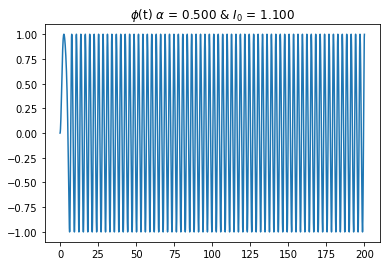

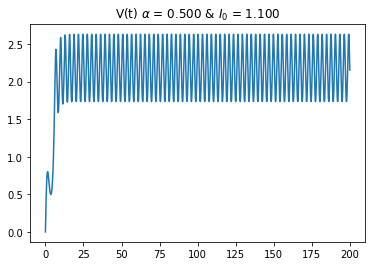

In [2]:
a = 0.5 # damping parameter
i = 1.1 # current

phi, v, tspan = jj.junction(0, 200, 20000, a, i)
phase = np.sin(phi) # Makes the angle into phase to understand more clearly

plt.figure(1)
plt.title(r'$\phi$(t) $\alpha$ = {:.3f} & $I_0$ = {:.3f}'.format(a, i))
plt.plot(tspan, phase)

plt.figure(2)
plt.title(r'V(t) $\alpha$ = {:.3f} & $I_0$ = {:.3f}'.format(a, i))
plt.plot(tspan, v)

plt.show()

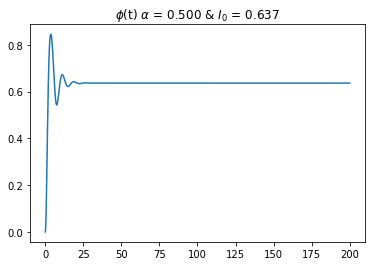

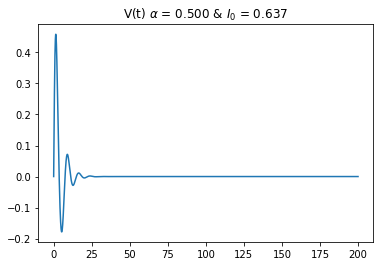

In [3]:
a = 0.5
i = 0.6366
phi, v, tspan = jj.junction(0, 200, 20000, a, i)

phase = np.sin(phi)

plt.figure(1)
plt.title(r'$\phi$(t) $\alpha$ = {:.3f} & $I_0$ = {:.3f}'.format(a, i))
plt.plot(tspan, phase)

plt.figure(2)
plt.title(r'V(t) $\alpha$ = {:.3f} & $I_0$ = {:.3f}'.format(a, i))
plt.plot(tspan, v)

plt.show()

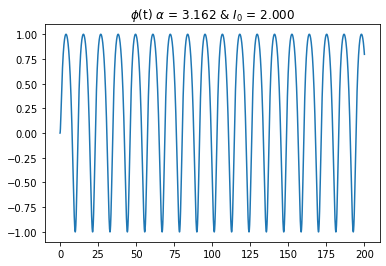

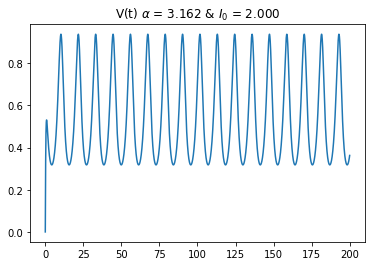

In [4]:
a = 1/np.sqrt(0.1)
i = 2
phi, v, tspan = jj.junction(0, 200, 20000, a, i)

phase = np.sin(phi)

plt.figure(1)
plt.title(r'$\phi$(t) $\alpha$ = {:.3f} & $I_0$ = {:.3f}'.format(a, i))
plt.plot(tspan, phase)

plt.figure(2)
plt.title(r'V(t) $\alpha$ = {:.3f} & $I_0$ = {:.3f}'.format(a, i))
plt.plot(tspan, v)

plt.show()

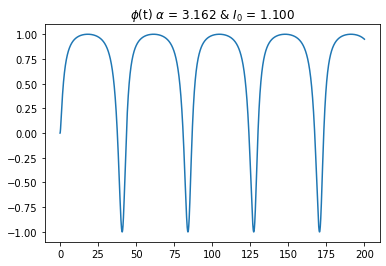

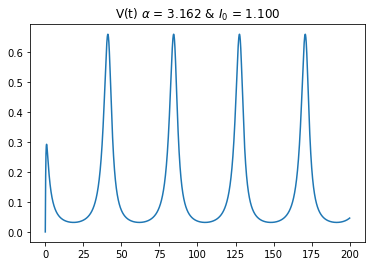

In [5]:
a = 1/np.sqrt(0.1)
i = 1.1
phi, v, tspan = jj.junction(0, 200, 20000, a, i)

phase = np.sin(phi)

plt.figure(1)
plt.title(r'$\phi$(t) $\alpha$ = {:.3f} & $I_0$ = {:.3f}'.format(a, i))
plt.plot(tspan, phase)

plt.figure(2)
plt.title(r'V(t) $\alpha$ = {:.3f} & $I_0$ = {:.3f}'.format(a, i))
plt.plot(tspan, v)

plt.show()

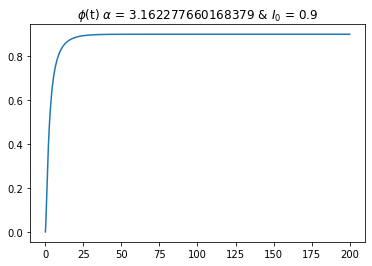

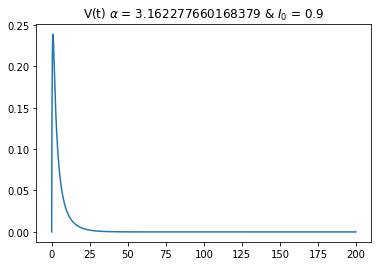

In [6]:
a = 1/np.sqrt(0.1)
i = 0.9
phi, v, tspan = jj.junction(0, 200, 20000, a, i)

phase = np.sin(phi)

plt.figure(1)
plt.title(r'$\phi$(t) $\alpha$ = {} & $I_0$ = {}'.format(a, i))
plt.plot(tspan, phase)

plt.figure(2)
plt.title(r'V(t) $\alpha$ = {} & $I_0$ = {}'.format(a, i))
plt.plot(tspan, v)

plt.show()

These graphs match the slides and are what we can expect for individual Josephson Junctions. This now can be applied to the simulation of neurons as described in Josephson junction simulation of neurons (reference 2 in wiki)

Now lets look at the efficiency. This will most likely not be as fast as possible because the function must make use of a for loop because of the Newton's method

In [9]:
%timeit jj.junction(0, 200, 20000, a, i)

279 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The calculation of the entire junction with 20000 steps is about 0.28 seconds so this can be very slow when simulating the network. The actual time span the junctions function is on the order of picoseconds. This is more a proof of concept.